In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import os

from cili.util import *
from cili.cleanup import *

import matplotlib.pyplot as plt

In [4]:
data_path = '/tank/shared/2021/visual/HCP_movie_unprocessed/'

In [43]:
samps, events = load_eyelink_dataset(os.path.join(data_path, 'eyetrack', '115017', '115017_7T_MOV3_eyetrack.asc'))

In [44]:
# samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
# samps = interp_zeros(samps, interp_fields=["pup_l"])

In [45]:
events.dframes['MSG'][events.dframes['MSG'].label == "TRIALID"]

,name,label,content
87224993,MSG,TRIALID,1
87225954,MSG,TRIALID,2
87226954,MSG,TRIALID,3
87227959,MSG,TRIALID,4
87228954,MSG,TRIALID,5
...,...,...,...
88135013,MSG,TRIALID,911
88136013,MSG,TRIALID,912
88137013,MSG,TRIALID,913
88138013,MSG,TRIALID,914


In [49]:
first_tr_el_time = events.dframes['MSG'][events.dframes['MSG'].label == "TRIALID"].index[0]
last_tr_el_time = events.dframes['MSG'][events.dframes['MSG'].label == "TRIALID"].index[-1] + 1000
print(first_tr_el_time, last_tr_el_time)

87224993 88140013


In [50]:
fMRI_el_samples = samps[(samps.index >= first_tr_el_time) & (samps.index <= last_tr_el_time)]
print(fMRI_el_samples.shape)

(915021, 4)


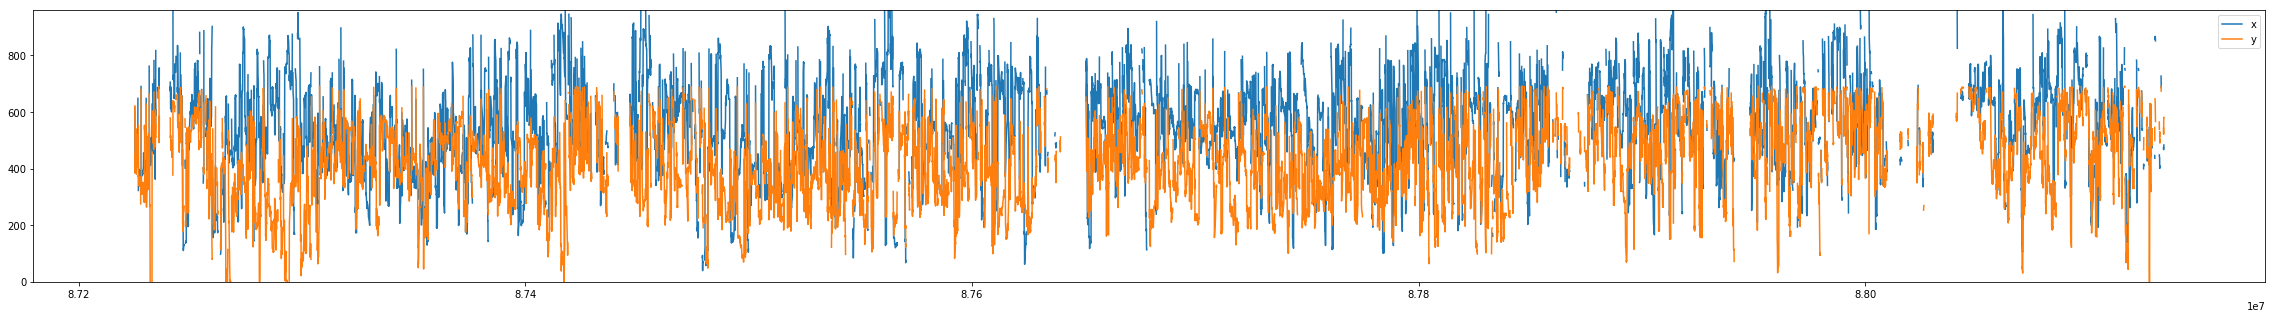

In [52]:
ssr = 50
n_seconds = 920

plt.figure(figsize=(40,5))
plt.plot(fMRI_el_samples.x_l[:n_seconds*1000:ssr], label='x')
plt.plot(fMRI_el_samples.y_l[:n_seconds*1000:ssr], label='y')
plt.ylim(0,960)
plt.legend()

In [53]:
os.rmdir?

Signature: os.rmdir(path, *, dir_fd=None)
Docstring:
Remove a directory.

If dir_fd is not None, it should be a file descriptor open to a directory,
  and path should be relative; path will then be relative to that directory.
dir_fd may not be implemented on your platform.
  If it is unavailable, using it will raise a NotImplementedError.
Type:      builtin_function_or_method
